In [1]:
from astropy.stats import LombScargle
import numpy as np
import rafias_lib as rl
import glob, pdb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Detrending test

In [2]:
files_sub1 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB-60*_1_481_SE_*/*.slp.fits'))
len(files_sub1)

306

In [3]:
files_sub2 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB-60*_1_489_SE_*/*.slp.fits'))[:306]
len(files_sub2)

306

In [4]:
centers_sub1 = rl.gen_center_g2d(166,160,5,400,2,2,0,files_sub1)

In [5]:
centers_sub2 = rl.gen_center_g2d(162,156,5,500,2,2,0,files_sub2)

In [7]:
a1 = np.array(rl.time_series(centers_sub1[1], centers_sub1[2], files_sub1, 70, 72, 80))
b4 = np.array(rl.time_series(centers_sub2[1], centers_sub2[2], files_sub2, 70, 72, 80))

In [7]:
av_flux = (a1['res_flux'] + b4['res_flux'])/2.
av_det = rl.linear_bestfit(b4['time'], av_flux, 0.00002, 1)

In [9]:
a1_detflux = np.array(rl.linear_bestfit(a1['time'], a1['res_flux'], 0.00002, 1))
b4_detflux = np.array(rl.linear_bestfit(b4['time'], b4['res_flux'], 0.00002, 1))
det_av = (a1_detflux + b4_detflux)/2.

In [9]:
print 'detrended and then averaged:', np.std(det_av)*1e6
print 'averaged and then detrended:', np.std(av_det)*1e6

detrended and then averaged: 499.548788671
averaged and then detrended: 584.938558062


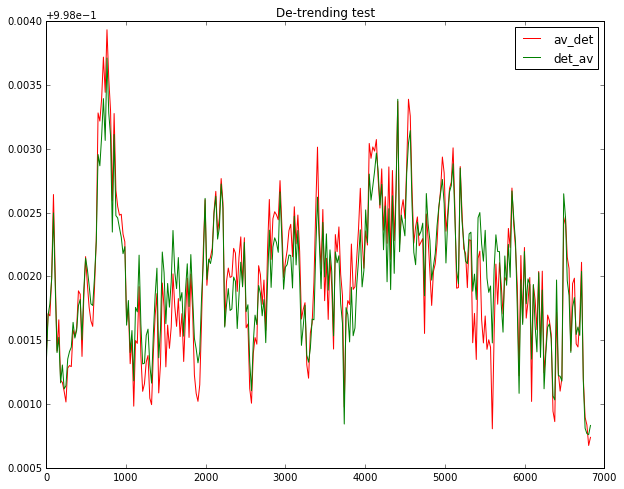

In [13]:
plt.plot(a1['time'], av_det, 'r-', label = 'av_det')
plt.plot(a1['time'], det_av, 'g-', label = 'det_av')
plt.legend(loc = 'best')
plt.title('De-trending test')

# Periodogram

In [6]:
def get_det_av(fname1, fname2, cen1, cen2, r = False):
    a1 = np.array(rl.time_series(cen1[1], cen1[2], fname1, 70, 72, 80, red = r))
    b4 = np.array(rl.time_series(cen2[1], cen2[2], fname2, 70, 72, 80, red = r))
    a1_detflux = np.array(rl.linear_bestfit(a1['time'], a1['res_flux'], 0.00002, 1))
    b4_detflux = np.array(rl.linear_bestfit(b4['time'], b4['res_flux'], 0.00002, 1))
    pdb.set_trace()
    det_av = (a1_detflux + b4_detflux)/2.
    return a1['time'], det_av

In [28]:
files_sub6401 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB640-60*_1_481_SE_*/*.slp.fits'))
len(files_sub6401)

60

In [29]:
files_sub6402 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB640-60*_1_489_SE_*/*.slp.fits'))
len(files_sub6402)

60

In [30]:
centers_sub6401 = rl.gen_center_g2d(326,320,5,400,2,2,0,files_sub6401)

In [31]:
centers_sub6402 = rl.gen_center_g2d(319,316,5,500,2,2,0,files_sub6402)

In [32]:
time_sub6, flux_sub6 = get_det_av(files_sub6401, files_sub6402, centers_sub6401, centers_sub6402)

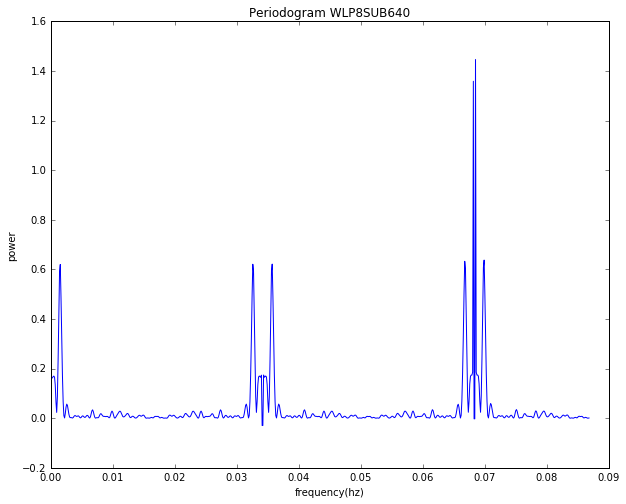

In [38]:
frequency, power = LombScargle(time_sub6, flux_sub6).autopower()
plt.plot(frequency, power)
plt.xlabel('frequency(hz)')
plt.ylabel('power')
plt.title('Periodogram WLP8SUB640')
# plt.xlim(0.02,0.04)
# plt.ylim(0, 0.02)

In [53]:
files_full11 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULL1-*_1_481_SE_*/*.slp.fits'))
len(files_full11)

225

In [54]:
files_full12 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8FULL1-*_1_489_SE_*/*.slp.fits'))
len(files_full12)

225

In [55]:
centers_full11 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,files_full11, red = True)

In [47]:
centers_full12 = rl.gen_center_g2d(828,821,5,600,4,4,0,files_full12, red = True)

In [56]:
time_full, flux_full = get_det_av(files_full11, files_full12, centers_full11, centers_full12, r = True)

> <ipython-input-48-26efa4853808>(7)get_det_av()
-> det_av = (a1_detflux + b4_detflux)/2.
(Pdb) a1
array([(0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 32.21028),
       (0.0, 0.0, 0.0, 64.42056), (0.0, 0.0, 0.0, 96.63083999999999),
       (0.0, 0.0, 0.0, 128.84112), (0.0, 0.0, 0.0, 161.0514),
       (0.0, 0.0, 0.0, 193.26167999999998),
       (0.0, 0.0, 0.0, 225.47195999999997), (0.0, 0.0, 0.0, 257.68224),
       (0.0, 0.0, 0.0, 289.89252), (0.0, 0.0, 0.0, 322.1028),
       (0.0, 0.0, 0.0, 354.31307999999996),
       (0.0, 0.0, 0.0, 386.52335999999997), (0.0, 0.0, 0.0, 418.73364),
       (0.0, 0.0, 0.0, 450.94391999999993),
       (0.0, 0.0, 0.0, 483.15419999999995), (0.0, 0.0, 0.0, 515.36448),
       (0.0, 0.0, 0.0, 547.57476), (0.0, 0.0, 0.0, 579.78504),
       (0.0, 0.0, 0.0, 611.99532), (0.0, 0.0, 0.0, 644.2056),
       (0.0, 0.0, 0.0, 676.4158799999999),
       (0.0, 0.0, 0.0, 708.6261599999999),
       (0.0, 0.0, 0.0, 740.8364399999999),
       (0.0, 0.0, 0.0, 773.0467199999999), (0.0, 

BdbQuit: 

In [50]:
time_full, flux_full

(array([    0.     ,    32.21028,    64.42056,    96.63084,   128.84112,
          161.0514 ,   193.26168,   225.47196,   257.68224,   289.89252,
          322.1028 ,   354.31308,   386.52336,   418.73364,   450.94392,
          483.1542 ,   515.36448,   547.57476,   579.78504,   611.99532,
          644.2056 ,   676.41588,   708.62616,   740.83644,   773.04672,
          805.257  ,   837.46728,   869.67756,   901.88784,   934.09812,
          966.3084 ,   998.51868,  1030.72896,  1062.93924,  1095.14952,
         1127.3598 ,  1159.57008,  1191.78036,  1223.99064,  1256.20092,
         1288.4112 ,  1320.62148,  1352.83176,  1385.04204,  1417.25232,
         1449.4626 ,  1481.67288,  1513.88316,  1546.09344,  1578.30372,
         1610.514  ,  1642.72428,  1674.93456,  1707.14484,  1739.35512,
         1771.5654 ,  1803.77568,  1835.98596,  1868.19624,  1900.40652,
         1932.6168 ,  1964.82708,  1997.03736,  2029.24764,  2061.45792,
         2093.6682 ,  2125.87848,  2158.08876,  219

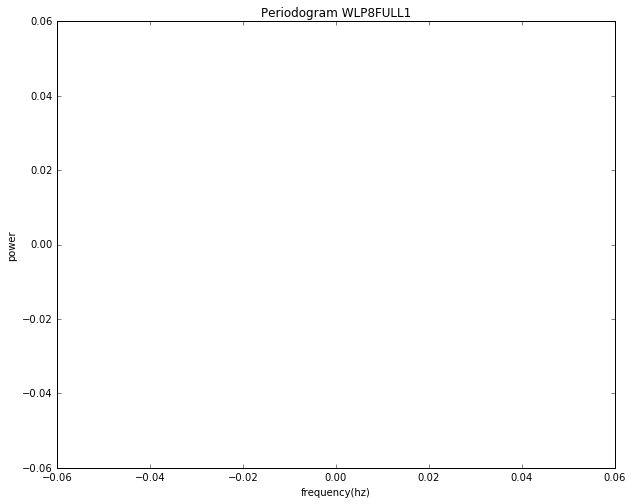

In [51]:
frequency, power = LombScargle(time_full, flux_full).autopower()
plt.plot(frequency, power)
plt.xlabel('frequency(hz)')
plt.ylabel('power')
plt.title('Periodogram WLP8FULL1')
# plt.xlim(0.02,0.04)
# plt.ylim(0, 0.02)

(0, 0.15)

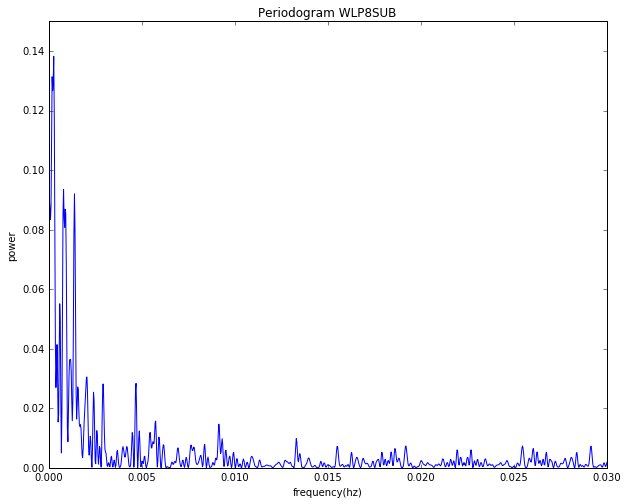

In [15]:
frequency, power = LombScargle(a1['time'], det_av).autopower()
plt.plot(frequency, power)
plt.xlabel('frequency(hz)')
plt.ylabel('power')
plt.title('Periodogram WLP8SUB')
plt.xlim(0,0.03)
plt.ylim(0, 0.15)